In [35]:
%load_ext autoreload
%autoreload 2
import os
import cv2
import numpy as np
if 'Notebooks' in os.getcwd():
    project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
    os.chdir(project_root)

from Modules.PreprocessingModule import Preprocessor
from Modules.DataLoaderModule import DataLoader
from Modules.StatisticsModule import Statistics
import pickle

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [80]:
loader = DataLoader()
X,Y = loader.load_data_from_folder_as_png('data')

In [81]:
X_test, Y_test = Preprocessor.augmentation(X,Y)

In [82]:
arr = tuple(X_test[0:8])
Hori = np.concatenate(arr, axis=1) 
    
cv2.imshow('image',Hori)
cv2.waitKey(0)

-1

In [83]:
Y[0:16]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=object)

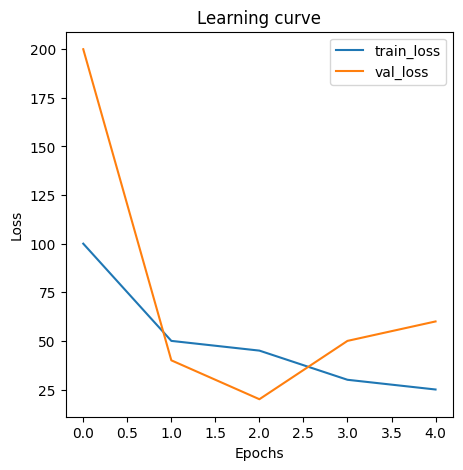

In [4]:
train = [100,50,45,30,25]
val = [200,40,20,50, 60]
Statistics.plot_learning_curve(train, val, True)

In [70]:
actual = np.random.binomial(1,.99,size = 1000)
predicted = np.random.binomial(1,.99,size = 1000)

<Figure size 500x500 with 0 Axes>

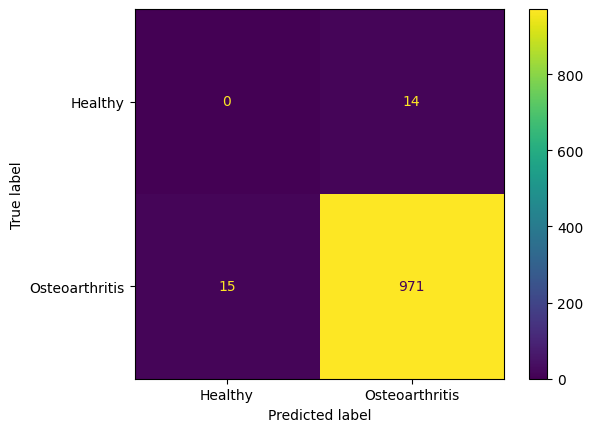

In [78]:
Statistics.plot_confusion_matrix(actual, predicted, True)

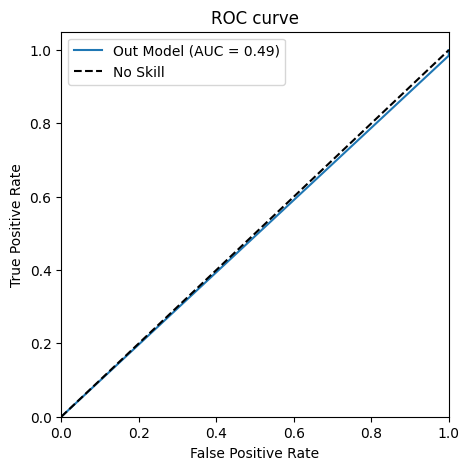

In [74]:
Statistics.plot_roc_curve(actual, predicted, True)

In [2]:
Y_pred_prob = np.random.normal(0.5, 0.2, 1000)

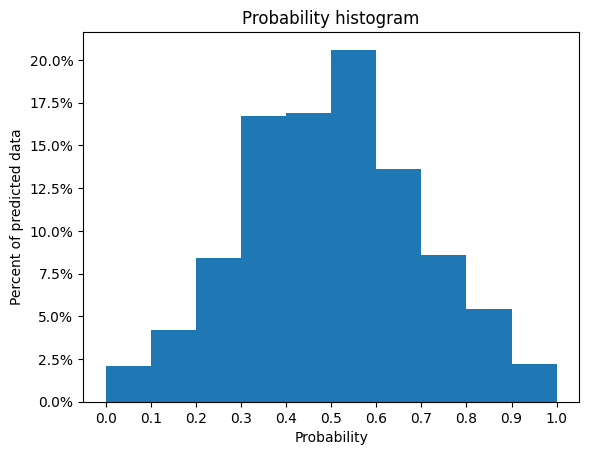

In [54]:
Statistics.plot_probability_histogram(Y_pred_prob)

In [6]:
Y = np.random.binomial(1,.9,size = 1000)
Y_pred = np.random.binomial(1,.9,size = 1000)

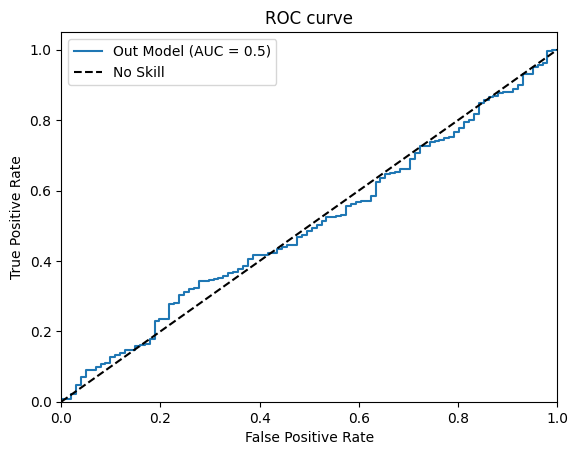

In [43]:
Statistics.plot_roc_curve(Y, Y_pred)

In [26]:
Statistics.auc(Y, Y_pred)

0.5091060806240557

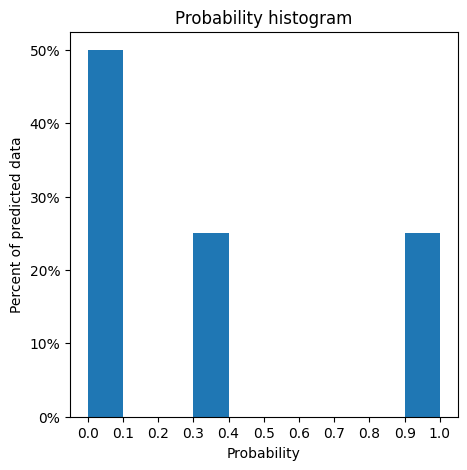

In [67]:
plt = Statistics.plot_probability_histogram(np.array([0,0,1,0.3]), True)

<Figure size 640x480 with 0 Axes>

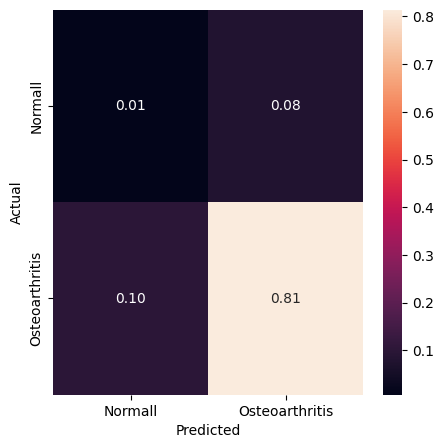

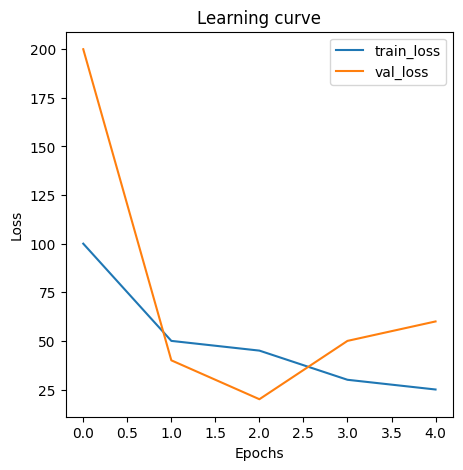

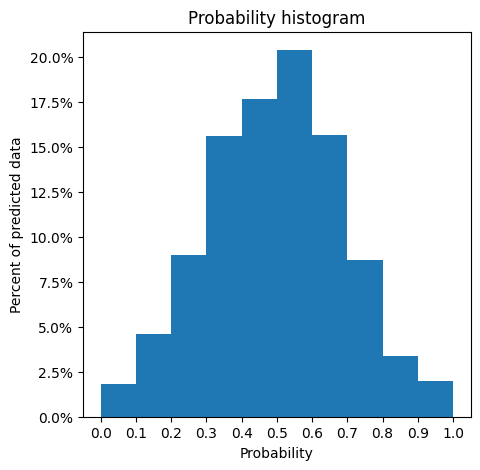

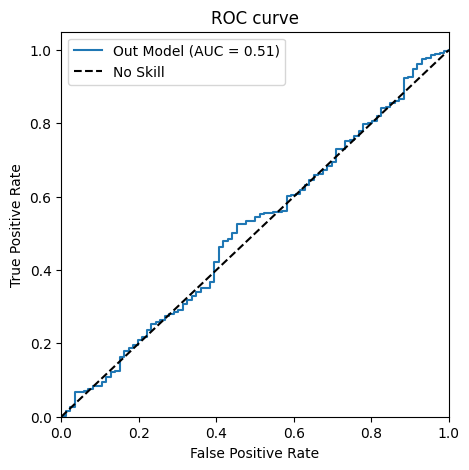

In [34]:
Statistics.report(Y, Y_pred, Y_pred_prob, train, val)

In [75]:
with open('history_test.pkl', 'rb') as pickle_file:
    loaded_file = pickle.load(pickle_file)

In [76]:
loaded_file.keys()

dict_keys(['AUC', 'Precision', 'Recall', 'accuracy', 'loss', 'val_AUC', 'val_Precision', 'val_Recall', 'val_accuracy', 'val_loss', 'f1_score', 'val_f1_score'])

In [77]:
train_loss = loaded_file['loss']
val_loss = loaded_file['val_loss']

In [78]:
with open('predictions_test.pkl', 'rb') as pickle_file2:
    loaded_file2 = pickle.load(pickle_file2)

In [79]:
loaded_file2.keys()

dict_keys(['prediction_train', 'prediction_label_train', 'prediction_val', 'prediction_label_val', 'prediction_test', 'prediction_label_test', 'label_train', 'label_val', 'label_test'])

In [80]:
Y = loaded_file2['label_test']
Y_pred = loaded_file2['prediction_label_test']
Y_pred_prob = loaded_file2['prediction_test']

In [81]:
len(Y)

621

In [82]:
len(Y_pred.flatten())

621

In [83]:
len(Y_pred_prob.flatten())

621

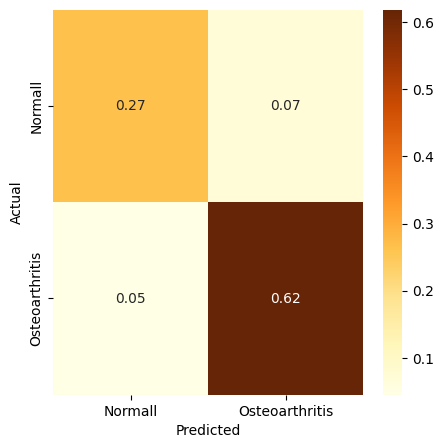

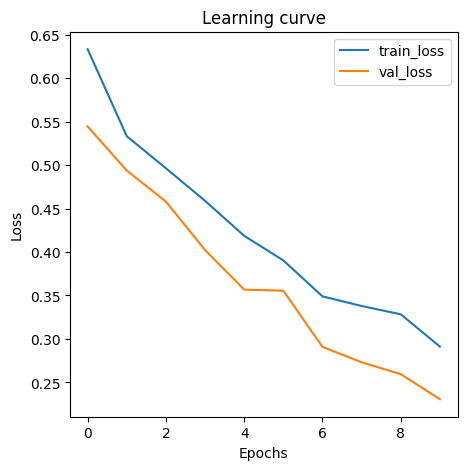

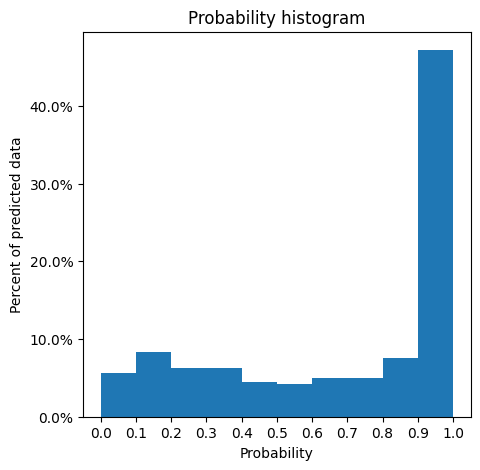

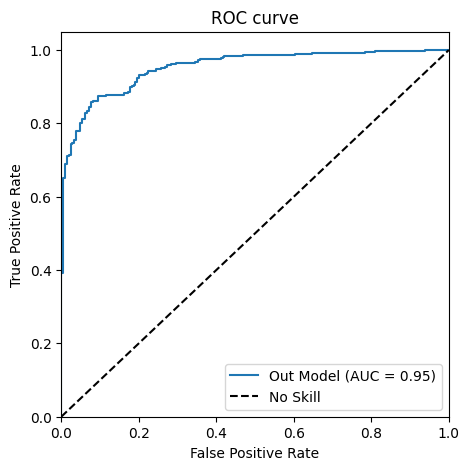

In [86]:
Statistics.report(Y, Y_pred.flatten(), Y_pred_prob.flatten(), train_loss, val_loss)